### EDA

#### Dataset Description: LibriSpeech (train-clean-100)

- **LibriSpeech** is a large-scale English speech dataset based on public domain audiobooks from LibriVox.
- Contains high-quality, clean speech audio sampled at **16 kHz**, along with transcripts.
- This experiment uses the **train-clean-100** subset with approximately **100 hours** of read English speech.
- Data is organized with `.flac` audio files and corresponding `.trans.txt` transcript files.


#### Metadata Collection for EDA

- Recursively extracts metadata from LibriSpeech folders:
  - `utt_id`: Unique utterance ID.
  - `flac_path`: Path to corresponding audio file.
  - `transcript`: Text transcription for the audio.
- Stores metadata in a Pandas DataFrame for easy inspection and analysis.



In [2]:
!pip install librosa pandas matplotlib seaborn torchaudio

     |████████████████████████████████| 260 kB 2.0 MB/s eta 0:00:01
  Using cached pandas-2.3.0-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     |████████████████████████████████| 1.1 MB 19.4 MB/s eta 0:00:01
  Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
     |████████████████████████████████| 78 kB 16.3 MB/s eta 0:00:01
  Using cached soxr-0.5.0.post1-cp310-cp310-macosx_11_0_arm64.whl (160 kB)
  Using cached numba-0.61.2-cp310-cp310-macosx_11_0_arm64.whl (2.8 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached llvmlite-0.44.0-cp310-cp310-macosx_11_0_arm64.whl (26.2 MB)
     |████████████████████████████████| 64 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 157 kB 13.1 MB/s eta 0:00:01
  Using cached idna-3.10-py3-

In [27]:
import os
import pandas as pd

base_path = "./../data/LibriSpeech/train-clean-100"

def collect_metadata(path):
    rows = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".trans.txt"):
                with open(os.path.join(root, file)) as f:
                    for line in f:
                        parts = line.strip().split(" ")
                        utt_id = parts[0]
                        transcript = " ".join(parts[1:])
                        flac_path = os.path.join(root, utt_id + ".flac")
                        rows.append((utt_id, flac_path, transcript))
    return pd.DataFrame(rows, columns=["utt_id", "flac_path", "transcript"])


df = collect_metadata(base_path)

df.head()

,utt_id,flac_path,transcript
0,1069-133709-0000,./../data/LibriSpeech/train-clean-100/1069/133...,HAD LAID BEFORE HER A PAIR OF ALTERNATIVES NOW...
1,1069-133709-0001,./../data/LibriSpeech/train-clean-100/1069/133...,PROPERTY ERECTS A KIND OF BARRIER YOU CAN DO A...
2,1069-133709-0002,./../data/LibriSpeech/train-clean-100/1069/133...,I MEAN OF COURSE IF YOU'LL TAKE A COMPANION SO...
3,1069-133709-0003,./../data/LibriSpeech/train-clean-100/1069/133...,SHE'D KEEP PEOPLE OFF VERY WELL I THINK
4,1069-133709-0004,./../data/LibriSpeech/train-clean-100/1069/133...,THAT IT'S A GREAT DEAL BETTER YOU SHOULD REMAI...


#### Initial Data Exploration

- Displays the first few rows of the metadata DataFrame using `df.head()`.
- Computes basic statistics on transcript lengths (in words) using:
  - `.str.split().str.len().describe()`
- Helps understand average transcript length, range, and overall data distribution.


In [28]:
print(df.head())
print(df['transcript'].str.split().str.len().describe())


             utt_id                                          flac_path  \
0  1069-133709-0000  ./../data/LibriSpeech/train-clean-100/1069/133...   
1  1069-133709-0001  ./../data/LibriSpeech/train-clean-100/1069/133...   
2  1069-133709-0002  ./../data/LibriSpeech/train-clean-100/1069/133...   
3  1069-133709-0003  ./../data/LibriSpeech/train-clean-100/1069/133...   
4  1069-133709-0004  ./../data/LibriSpeech/train-clean-100/1069/133...   

                                          transcript  
0  HAD LAID BEFORE HER A PAIR OF ALTERNATIVES NOW...  
1  PROPERTY ERECTS A KIND OF BARRIER YOU CAN DO A...  
2  I MEAN OF COURSE IF YOU'LL TAKE A COMPANION SO...  
3            SHE'D KEEP PEOPLE OFF VERY WELL I THINK  
4  THAT IT'S A GREAT DEAL BETTER YOU SHOULD REMAI...  
count    28539.000000
mean        34.692911
std         11.290097
min          2.000000
25%         29.000000
50%         36.000000
75%         42.000000
max         75.000000
Name: transcript, dtype: float64


#### Waveform Visualization and Playback

- Loads an audio file from LibriSpeech using `torchaudio`.
- Plots the raw waveform signal using `matplotlib`.
- Displays time-domain amplitude variations for the selected utterance.
- Optionally plays back the audio directly in notebook environments using `IPython.display.Audio`.


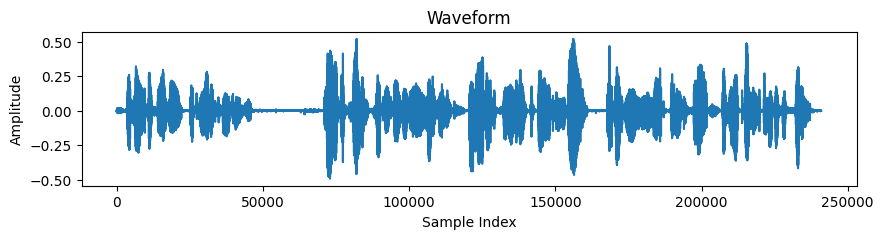

In [ ]:
import torchaudio
import librosa.display
import matplotlib.pyplot as plt

row = df.iloc[0]
waveform, sr = torchaudio.load(row.flac_path)

plt.figure(figsize=(10, 2))
plt.plot(waveform[0].numpy())
plt.title("Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

from IPython.display import Audio
Audio(waveform[0].numpy(), rate=sr)


#### Audio Duration Analysis

- Computes duration of each audio file in seconds using `torchaudio.info`.
- Adds a new column `duration_sec` to the DataFrame.
- Plots a histogram of audio durations using `seaborn` to visualize distribution.


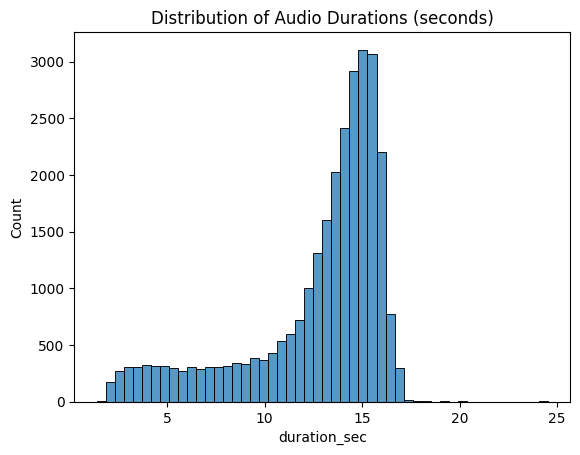

In [30]:
df["duration_sec"] = df["flac_path"].apply(lambda p: torchaudio.info(p).num_frames / sr)

import seaborn as sns
sns.histplot(df["duration_sec"], bins=50)
plt.title("Distribution of Audio Durations (seconds)")
plt.show()


#### Mel-Spectrogram Visualization

- Loads audio with `librosa` at 16 kHz sampling rate.
- Computes a **Mel-Spectrogram** with 128 filter banks to represent frequency content.
- Converts power spectrogram to decibel scale for better visualization.
- Plots the time-frequency representation using `librosa.display.specshow`.


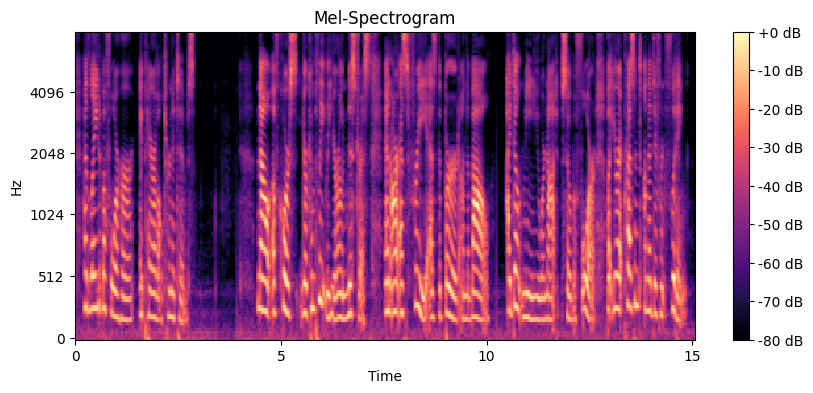

In [32]:
import librosa
import numpy as np

y, sr = librosa.load(row.flac_path, sr=16000)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


#### Transcript Length Analysis

- Adds columns for:
  - `num_words`: Number of words in each transcript.
  - `num_chars`: Number of characters in each transcript.
- Computes basic statistics for word and character counts using `.describe()`.
- Plots a histogram to visualize the distribution of words per utterance.


count    28539.000000
mean        34.692911
std         11.290097
min          2.000000
25%         29.000000
50%         36.000000
75%         42.000000
max         75.000000
Name: num_words, dtype: float64
count    28539.000000
mean       184.653211
std         58.646680
min          8.000000
25%        157.000000
50%        195.000000
75%        225.000000
max        398.000000
Name: num_chars, dtype: float64


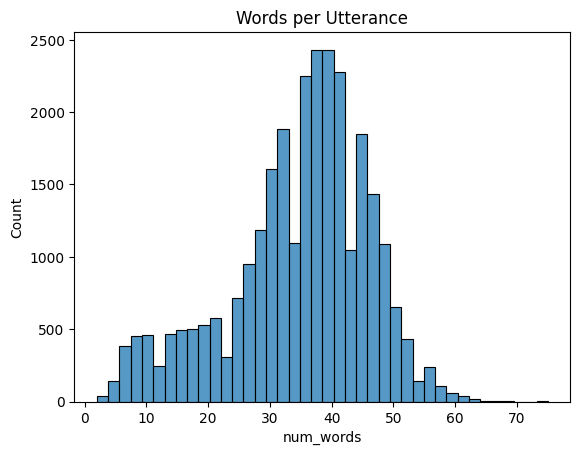

In [33]:
df["num_words"] = df["transcript"].str.split().apply(len)
df["num_chars"] = df["transcript"].apply(len)

print(df["num_words"].describe())
print(df["num_chars"].describe())

sns.histplot(df["num_words"], bins=40)
plt.title("Words per Utterance")
plt.show()


#### Word Frequency Analysis

- Combines all transcripts into a single text and tokenizes by splitting on spaces.
- Uses `Counter` to compute word frequencies.
- Displays the top 10 most common words.
- Plots a bar chart of the top 20 most frequent words using `seaborn`.


[('THE', 60133), ('AND', 33258), ('OF', 29876), ('TO', 27365), ('A', 21766), ('IN', 16508), ('I', 13311), ('WAS', 13262), ('HE', 13064), ('THAT', 12534)]


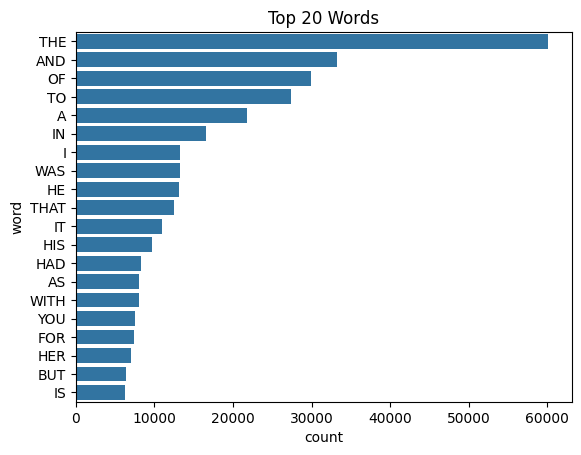

In [34]:
from collections import Counter

all_words = " ".join(df["transcript"]).split()
word_counts = Counter(all_words)

print(word_counts.most_common(10))

# Plot most common words
common_words = pd.DataFrame(word_counts.most_common(20), columns=["word", "count"])
sns.barplot(data=common_words, x="count", y="word")
plt.title("Top 20 Words")
plt.show()


#### Speaker Distribution Analysis

- Extracts `speaker_id` from each utterance ID.
- Computes the number of samples per speaker using `.value_counts()`.
- Displays summary statistics of speaker sample counts.
- Plots a histogram to visualize the distribution of samples per speaker.


count    251.000000
mean     113.701195
std       15.211652
min       26.000000
25%      108.000000
50%      114.000000
75%      121.500000
max      166.000000
Name: count, dtype: float64


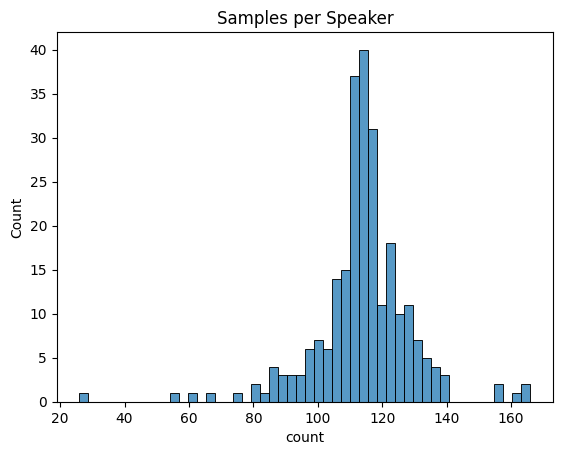

In [35]:
df["speaker_id"] = df["utt_id"].apply(lambda x: x.split("-")[0])
speaker_counts = df["speaker_id"].value_counts()
print(speaker_counts.describe())

sns.histplot(speaker_counts, bins=50)
plt.title("Samples per Speaker")
plt.show()


### EDA Results for LibriSpeech train-clean-100

The following table summarizes key findings from Exploratory Data Analysis (EDA):

| Metric                        | Observed Result                   | Ideal / Expected Value                    |
|-------------------------------|-----------------------------------|--------------------------------------------|
| **Audio Sample Rate**         | 16 kHz                            | 16 kHz (standard for speech tasks)         |
| **Audio Duration Distribution**| Majority between 10 - 17 seconds | 5 - 20 seconds typical for read speech     |
| **Mel-Spectrogram Observation**| Clear speech patterns visible    | Distinct, artifact-free time-frequency structure |
| **Words per Utterance (Mean)**| ~34.7 words                      | 20 - 50 words typical for LibriSpeech      |
| **Characters per Utterance (Mean)** | ~185 characters            | 100 - 250 characters typical               |
| **Most Common Words**         | "THE", "AND", "OF", "TO", "A"    | Function words expected to dominate        |
| **Total Unique Speakers**     | 251 speakers                     | Aligned with LibriSpeech standard splits   |
| **Samples per Speaker (Mean)**| ~114 samples per speaker         | Balanced dataset preferred (~100-150)      |


#### Summary of Results:

Audio duration and transcript lengths fall within expected ranges.  
Visual inspection of waveforms and spectrograms confirms clean, high-quality audio.  
Word frequency distribution reflects natural language with stopwords dominating.  
Speaker distribution is relatively balanced, suitable for speech model development.  

These results indicate the dataset is well-prepared for downstream speech-to-text or ASR tasks.

